- Title: Manipulate Videos Using MoviePy in Python
- Slug: python-moviepy
- Date: 2020-04-06 14:39:48
- Category: Computer Science
- Tags: programming, Python, computer vision, CV, video, MoviePy, clip
- Author: Ben Du
- Modified: 2022-05-21 16:04:37


Convert part (the 50 - 60 second) of a MOV video into a MP4 video.
Notice that MP4 and Webm as the output format are support 
while MOV and AVI (as the output format) are not.

## Installation

In [2]:
!pip3 install -q moviepy

Download video.

In [3]:
!wget --no-check-certificate https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_5mb.mp4 -O bunny.mp4

--2022-05-21 17:32:50--  https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_5mb.mp4
Resolving www.sample-videos.com (www.sample-videos.com)... 103.145.51.95
Connecting to www.sample-videos.com (www.sample-videos.com)|103.145.51.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5253880 (5.0M) [video/mp4]
Saving to: ‘bunny.mp4’

bunny.mp4           100%[===================>]   5.01M  2.15MB/s    in 2.3s    

2022-05-21 17:32:53 (2.15 MB/s) - ‘bunny.mp4’ saved [5253880/5253880]



In [6]:
import numpy as np
from PIL import Image 
import cv2 

In [7]:
vidcap = cv2.VideoCapture("bunny.mp4")

In [8]:
success, arr = vidcap.read()

In [9]:
arr

array([[[ 46, 112, 104],
        [ 31,  97,  89],
        [ 21,  92,  83],
        ...,
        [251, 223, 205],
        [251, 223, 205],
        [251, 223, 205]],

       [[ 44, 110, 102],
        [ 30,  96,  88],
        [ 22,  93,  84],
        ...,
        [251, 223, 205],
        [251, 223, 205],
        [251, 223, 205]],

       [[ 38, 104,  96],
        [ 26,  92,  84],
        [ 26,  97,  88],
        ...,
        [251, 223, 205],
        [251, 223, 205],
        [251, 223, 205]],

       ...,

       [[ 43, 131, 138],
        [ 57, 145, 152],
        [ 70, 153, 161],
        ...,
        [ 24, 117, 109],
        [ 27, 135, 116],
        [ 46, 154, 135]],

       [[ 54, 145, 151],
        [ 67, 158, 164],
        [ 72, 160, 167],
        ...,
        [ 27, 115, 108],
        [ 25, 128, 110],
        [ 46, 149, 131]],

       [[ 62, 153, 159],
        [ 68, 159, 165],
        [ 70, 158, 165],
        ...,
        [ 33, 121, 114],
        [ 28, 131, 113],
        [ 42, 145, 127]]

In [11]:
arr.shape

(720, 1280, 3)

The numpy array is the `BGR` (instead of `RGB`) representation of the image,
which means that you have to flip the last dimension of the numpy array
so that it can loaded using the Pillow library correctly.

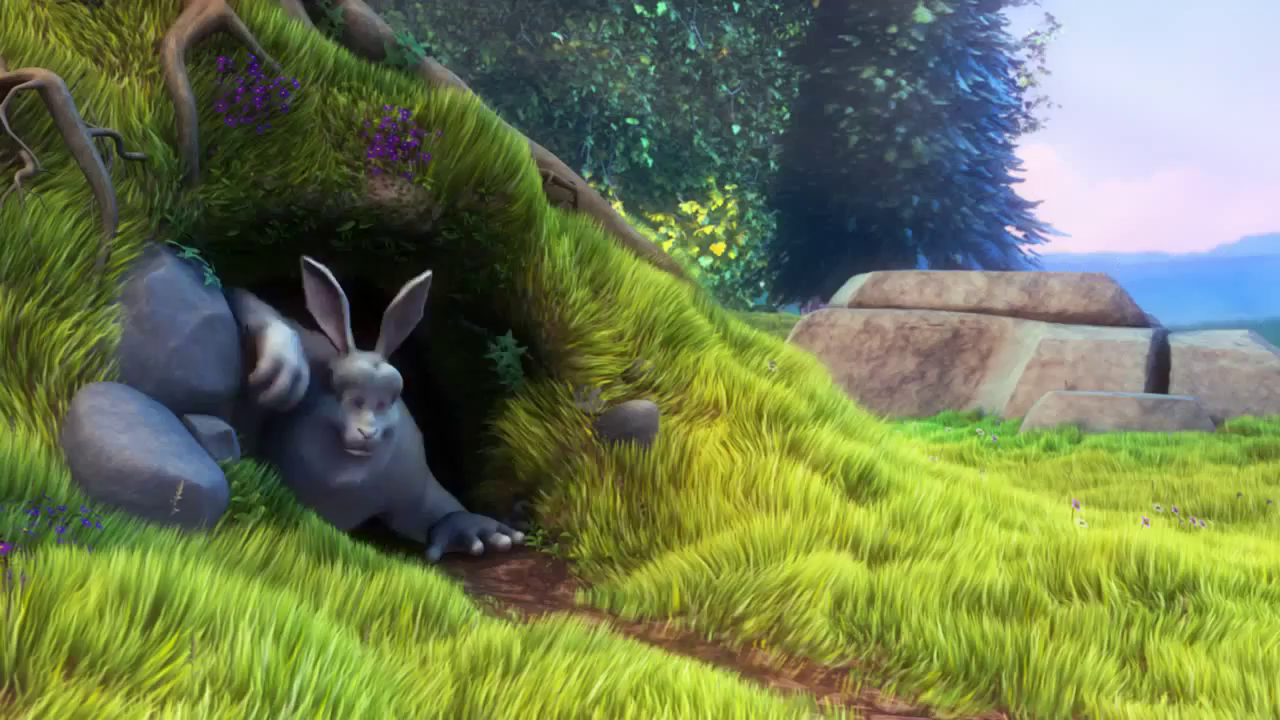

In [10]:
Image.fromarray(np.flip(arr, 2))

In [9]:
img.size

(1280, 720)

Extract a sub video with part of the original frame.

In [12]:
from moviepy.editor import VideoFileClip

video = VideoFileClip("bunny.mp4").subclip(0, 10).crop(x2=640)
video.write_videofile("sub.mp4")

Moviepy - Building video sub.mp4.
MoviePy - Writing audio in subTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video sub.mp4



Moviepy - Done !
Moviepy - video ready sub.mp4


In [13]:
vidcap = cv2.VideoCapture("sub.mp4")

In [14]:
sucess, arr = vidcap.read()

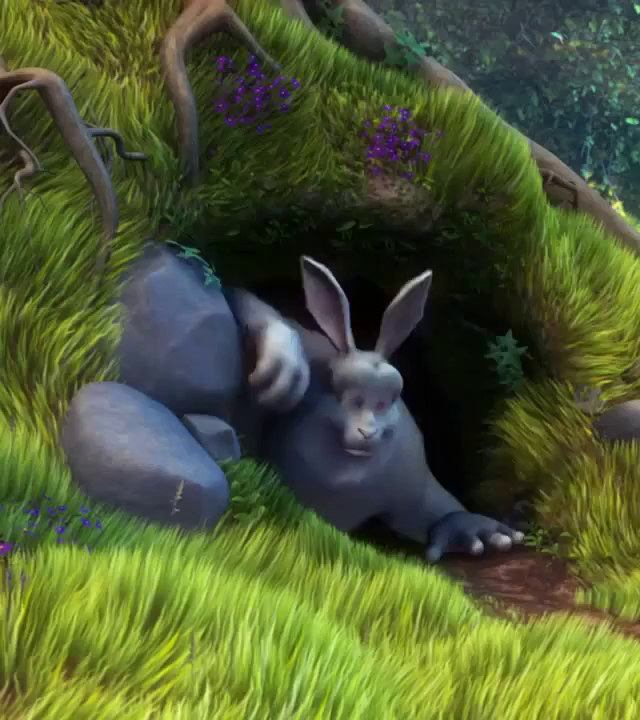

In [15]:
img = Image.fromarray(np.flip(arr, 2))
img

In [16]:
img.size

(640, 720)

## References

- [Extract Images from Video Using OpenCV in Python](https://www.legendu.net/en/blog/python-opencv-video-to-image/)

- [MoviePy Gallery](https://zulko.github.io/moviepy/gallery.html)

- [MoviePy @ GitHub](https://zulko.github.io/moviepy/)

- [Big Buck Bunny @ archive.org](https://archive.org/download/BigBuckBunny_328/BigBuckBunny_512kb.mp4)